In [1]:
#focus on temporal component such as season and period, and matchup/opponent

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

//anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
data = pd.read_csv('data.csv')
print data.shape
data.info()

(30697, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
action_type           30697 non-null object
combined_shot_type    30697 non-null object
game_event_id         30697 non-null int64
game_id               30697 non-null int64
lat                   30697 non-null float64
loc_x                 30697 non-null int64
loc_y                 30697 non-null int64
lon                   30697 non-null float64
minutes_remaining     30697 non-null int64
period                30697 non-null int64
playoffs              30697 non-null int64
season                30697 non-null object
seconds_remaining     30697 non-null int64
shot_distance         30697 non-null int64
shot_made_flag        25697 non-null float64
shot_type             30697 non-null object
shot_zone_area        30697 non-null object
shot_zone_basic       30697 non-null object
shot_zone_range       30697 non-null object
team_id               30697 non-null int64
team_n

In [3]:
#target variable, 5000 missing as test dataset
print data['shot_made_flag'].value_counts()
print data['shot_made_flag'].isnull().sum()

0.0    14232
1.0    11465
Name: shot_made_flag, dtype: int64
5000


## Playoffs

Not very different on its own, but can combine with season and period

In [8]:
data['playoffs'].value_counts()

0    26198
1     4499
Name: playoffs, dtype: int64

In [9]:
data.groupby('playoffs')['shot_made_flag'].mean()

playoffs
0    0.446420
1    0.444651
Name: shot_made_flag, dtype: float64

## Season

Consistently between 0.4 and 0.5, except the last three seasons; maybe create a feature for last-three-seasons

In [4]:
data['season'].value_counts()

2005-06    2318
2008-09    2242
2002-03    2241
2007-08    2153
2009-10    2080
2001-02    2028
2006-07    1887
2000-01    1868
2010-11    1825
2003-04    1638
2011-12    1637
2012-13    1593
1999-00    1577
2004-05    1324
2015-16    1113
1997-98     989
1998-99     921
2014-15     713
1996-97     477
2013-14      73
Name: season, dtype: int64

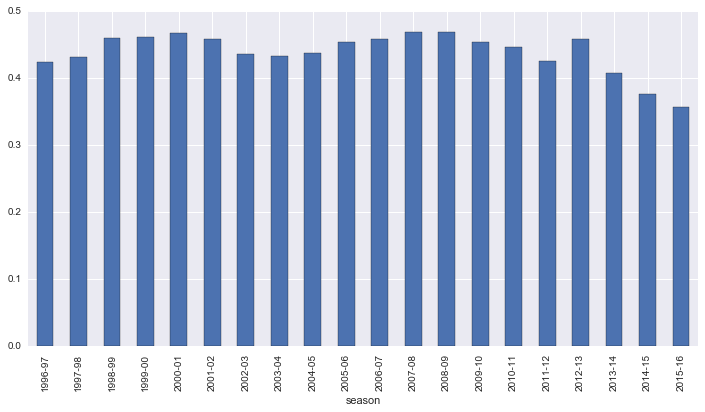

In [5]:
data.groupby('season')['shot_made_flag'].mean().plot(kind='bar',figsize=(12,6))

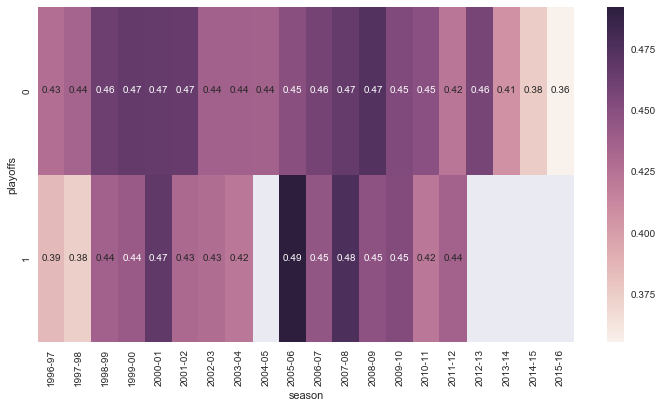

In [11]:
data_agg = data.groupby(['playoffs','season'])['shot_made_flag'].mean().unstack(level='season')
plt.figure(figsize=(12,6))
sns.heatmap(data_agg,annot=True)

## Period, and period with season

Consist 0.4-0.5, the last three period more variable but low number

In [7]:
data['period'].value_counts()

3    8296
1    8048
4    7260
2    6718
5     330
6      38
7       7
Name: period, dtype: int64

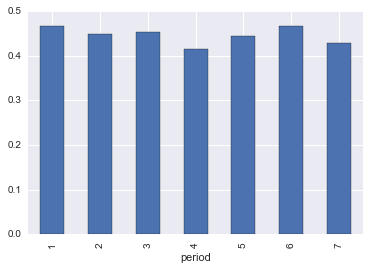

In [6]:
data.groupby('period')['shot_made_flag'].mean().plot(kind='bar')

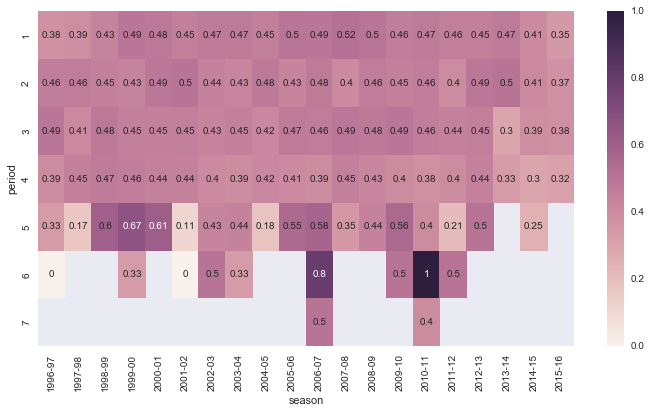

In [10]:
data_agg = data.groupby(['period','season'])['shot_made_flag'].mean().unstack(level='season')
plt.figure(figsize=(12,6))
sns.heatmap(data_agg,annot=True)

## minutes_remaining and seconds_remaining

Create 'seconds_total'; overall distribution not different; except the last minute; create features for 'last_minute'

In [12]:
data['minutes_remaining'].value_counts()

0     3866
4     2855
3     2839
2     2834
1     2734
5     2651
6     2383
7     2215
9     2202
8     2139
10    2122
11    1857
Name: minutes_remaining, dtype: int64

In [13]:
data['seconds_remaining'].value_counts()

0     985
1     659
2     598
32    557
4     557
28    550
5     549
36    546
41    541
25    536
40    527
13    526
44    526
38    526
11    526
37    523
23    521
3     520
33    519
24    518
27    512
8     511
16    510
18    509
45    508
47    507
57    507
14    507
34    506
19    504
31    504
10    503
42    501
43    501
35    499
22    498
7     498
20    496
39    494
21    494
17    492
26    491
30    486
29    486
15    483
12    478
6     474
50    473
9     469
52    468
56    464
59    462
46    461
48    460
51    457
49    454
58    447
54    445
53    437
55    431
Name: seconds_remaining, dtype: int64

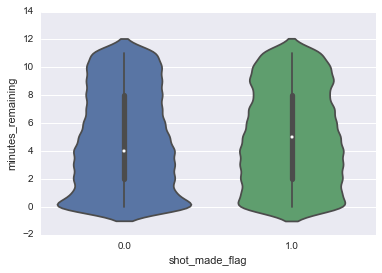

In [14]:
sns.violinplot(x='shot_made_flag',y='minutes_remaining',data=data)

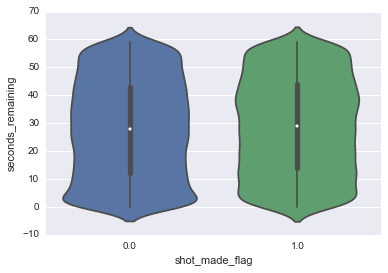

In [15]:
sns.violinplot(x='shot_made_flag',y='seconds_remaining',data=data)

In [16]:
data['seconds_total'] = data['minutes_remaining']*60 + data['seconds_remaining']
data['seconds_total'].describe()

count    30697.000000
mean       321.502525
std        208.175176
min          0.000000
25%        142.000000
50%        304.000000
75%        498.000000
max        714.000000
Name: seconds_total, dtype: float64

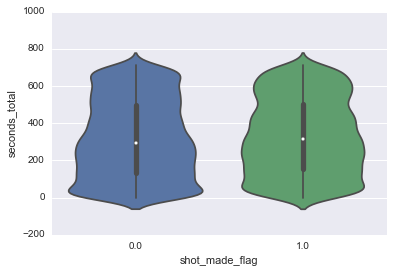

In [17]:
sns.violinplot(x='shot_made_flag',y='seconds_total',data=data)

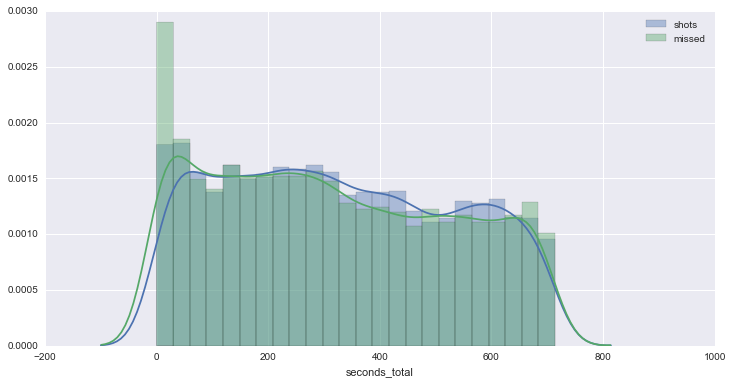

In [18]:
plt.figure(figsize=(12,6))
sns.distplot(data[data['shot_made_flag']==1.0]['seconds_total'],label='shots')
sns.distplot(data[data['shot_made_flag']==0.0]['seconds_total'],label='missed')
plt.legend()

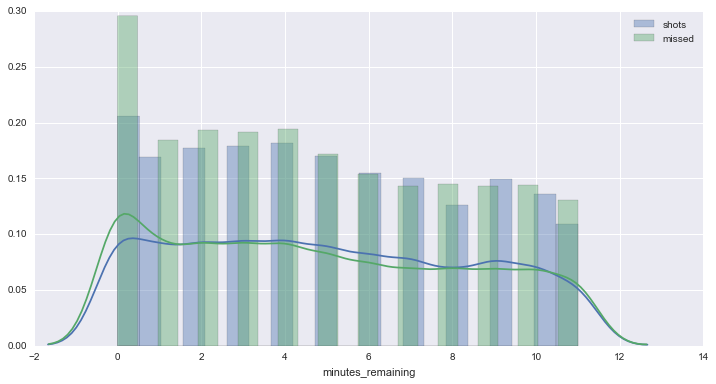

In [19]:
plt.figure(figsize=(12,6))
sns.distplot(data[data['shot_made_flag']==1.0]['minutes_remaining'],label='shots')
sns.distplot(data[data['shot_made_flag']==0.0]['minutes_remaining'],label='missed')
plt.legend()

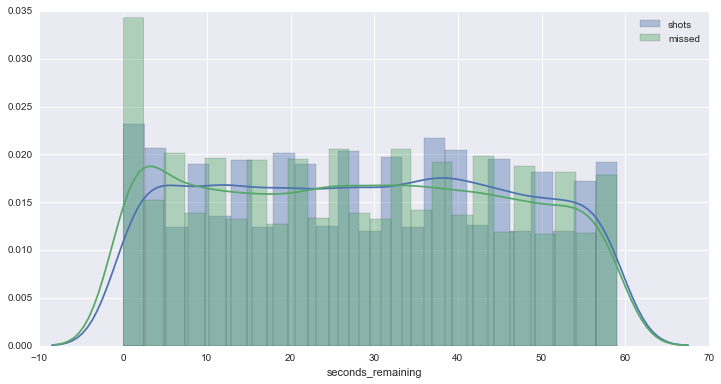

In [20]:
plt.figure(figsize=(12,6))
sns.distplot(data[data['shot_made_flag']==1.0]['seconds_remaining'],label='shots')
sns.distplot(data[data['shot_made_flag']==0.0]['seconds_remaining'],label='missed')
plt.legend()

## opponent

Consistent 0.4-0.5, maybe some teams BKN/NOP, few games and low percentage
Among regular teams, IND and MIL has low percentage

In [21]:
data['opponent'].value_counts()

SAS    1978
PHX    1781
HOU    1666
SAC    1643
DEN    1642
POR    1539
UTA    1490
MIN    1474
GSW    1356
LAC    1285
DAL    1199
MEM    1030
BOS     946
SEA     828
IND     761
PHI     720
ORL     719
DET     715
OKC     677
TOR     664
NYK     657
MIA     627
CHA     620
CLE     619
CHI     610
WAS     600
MIL     586
NOH     581
NJN     520
ATL     519
NOP     344
VAN     246
BKN      55
Name: opponent, dtype: int64

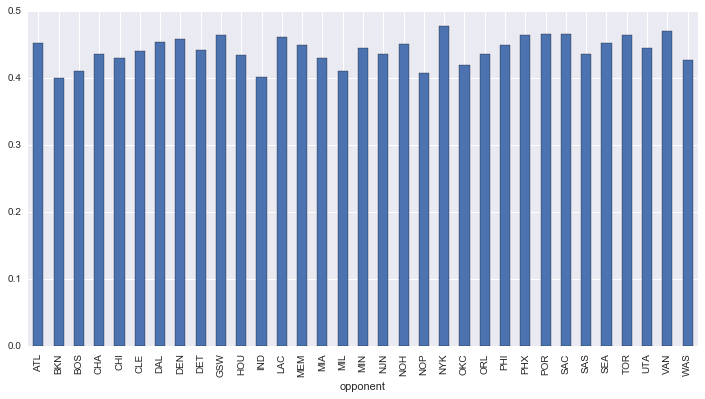

In [22]:
plt.figure(figsize=(12,6))
data.groupby('opponent')['shot_made_flag'].mean().plot(kind='bar')

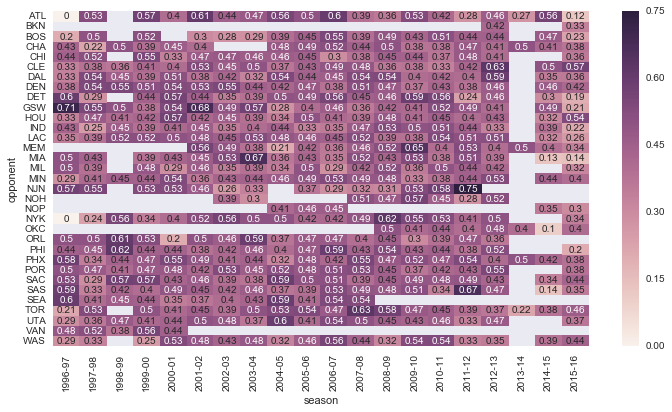

In [23]:
data_agg = data.groupby(['opponent','season'])['shot_made_flag'].mean().unstack(level='season')
plt.figure(figsize=(12,6))
sns.heatmap(data_agg,annot=True)

## Modify base model

'season' is not helping 
<br>
'last_three_season' is not helping
<br>
'period' slight decrease
<br>
'last_minute' slight decrease
<br>
'opponent' is not helping
<br>
'low_opponent' with a few teams, slight decrease

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import KFold, train_test_split,cross_val_score
from sklearn import metrics

#input df with both train and test
def base_feature(data):
    #at home or not
    data['home?'] = data['matchup'].apply(lambda x: x.split('@')[0].strip()=='LAL')
    #2-point or 3-point shot
    data['shot_type?'] = data['shot_type']=='2PT Field Goal'
    #playoff or not
    data['playoffs?'] = data['playoffs']==1
    return data

#encode categorical variable into sorted integer, and plotting
def sort_encode(df, field):
    ct = pd.crosstab(df.shot_made_flag, df[field]).apply(lambda x:x/x.sum(), axis=0)
    temp = list(zip(ct.values[1, :], ct.columns))
    temp.sort()
    new_map = {}
    for index, (acc, old_number) in enumerate(temp):
        new_map[old_number] = index
    new_field = field + '_sort_enumerated'
    df[new_field] = df[field].map(new_map)
    get_acc(df, new_field)


#plot one col in df against shot_made_flag percentage
def get_acc(df, col):
    ct = pd.crosstab(df.shot_made_flag, df[col]).apply(lambda x:x/x.sum(), axis=0)
    x, y = ct.columns, ct.values[1, :]
    plt.figure(figsize=(7, 5))
    plt.plot(x, y)
    plt.xlabel(col)
    plt.ylabel('% shots made')
    #plt.savefig(against + '_vs_accuracy.png')



In [25]:
#base modeling with randomforest
def test_accuracy(data): #input data with cols_use and 'shot_made_flag'
    clf = RandomForestClassifier(n_estimators=100,n_jobs=-1,max_depth=7) #specify tree and depth
    return cross_val_score(clf, data.drop('shot_made_flag', 1), data.shot_made_flag,scoring='accuracy', cv=10)

# another test function with roc_auc as metrics instead of accuracy
def test_auc(data): #input data with cols_use and 'shot_made_flag'
    clf = RandomForestClassifier(n_estimators=100,n_jobs=-1,max_depth=7) #specify tree and depth
    return cross_val_score(clf, data.drop('shot_made_flag', 1), data.shot_made_flag,\
                           scoring='roc_auc', cv=10)

In [27]:
data = base_feature(data)
data.columns

Index([u'action_type', u'combined_shot_type', u'game_event_id', u'game_id',
       u'lat', u'loc_x', u'loc_y', u'lon', u'minutes_remaining', u'period',
       u'playoffs', u'season', u'seconds_remaining', u'shot_distance',
       u'shot_made_flag', u'shot_type', u'shot_zone_area', u'shot_zone_basic',
       u'shot_zone_range', u'team_id', u'team_name', u'game_date', u'matchup',
       u'opponent', u'shot_id', u'seconds_total', u'abs_loc_x', u'home?',
       u'shot_type?', u'playoffs?'],
      dtype='object')

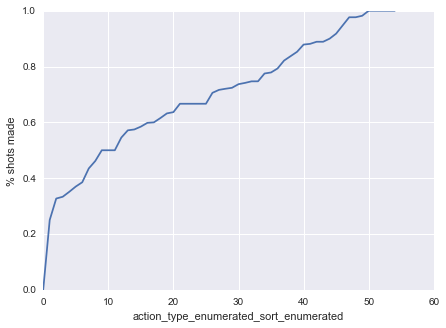

In [28]:
action_map = {action: i for i, action in enumerate(data.action_type.unique())}
data['action_type_enumerated'] = data.action_type.map(action_map)
#add column 'action_type_enumerated_sort_enumerated'
sort_encode(data, 'action_type_enumerated')

In [29]:
data['abs_loc_x'] = data['loc_x'].apply(lambda x: abs(x))
cols_use1=['action_type_enumerated_sort_enumerated','abs_loc_x','loc_y',
     'playoffs?','home?', 'shot_type?', 'shot_distance','shot_made_flag']
df = data[cols_use1]
df = df.dropna()
print test_auc(df).mean()
print test_accuracy(df).mean()

0.700433795414
0.682607000244


0.688161337353
0.678324981671


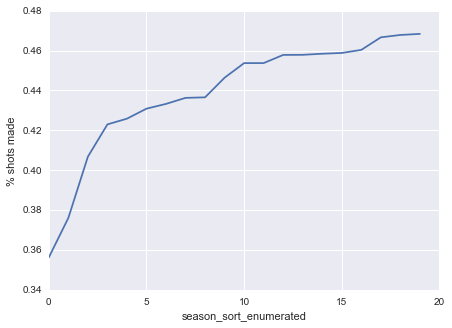

In [30]:
#add season_sort_enumerated, decrease in both metrics
sort_encode(data,'season')
cols_use2=['action_type_enumerated_sort_enumerated','abs_loc_x','loc_y',
           'season_sort_enumerated',
     'playoffs?','home?', 'shot_type?', 'shot_distance','shot_made_flag']
df = data[cols_use2]
df = df.dropna()
print test_auc(df).mean()
print test_accuracy(df).mean()

In [31]:
data['season'].unique()

array(['2000-01', '2001-02', '2002-03', '2003-04', '2004-05', '2005-06',
       '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12',
       '2012-13', '2013-14', '2014-15', '2015-16', '1996-97', '1997-98',
       '1998-99', '1999-00'], dtype=object)

In [36]:
data['last_three_season'] = ~data['season'].isin(['2013-14', '2014-15', '2015-16'])
data['last_three_season'].value_counts()

True     28798
False     1899
Name: last_three_season, dtype: int64

In [37]:
#add last_three_season, either true or false, decrease in both metrics
cols_use2=['action_type_enumerated_sort_enumerated','abs_loc_x','loc_y','last_three_season',
     'playoffs?','home?', 'shot_type?', 'shot_distance','shot_made_flag']
df = data[cols_use2]
df = df.dropna()
print test_auc(df).mean()
print test_accuracy(df).mean()

0.69700388734
0.679998830122


0.699513986288
0.682840387549


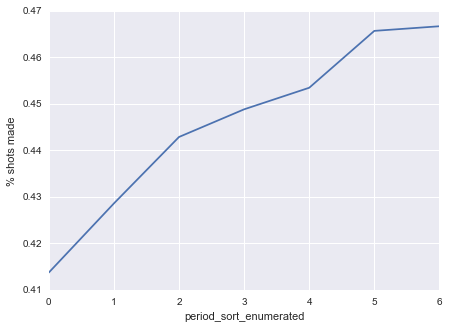

In [38]:
#add period_sort_enumerated, slight decrease in both metrics
sort_encode(data,'period')
cols_use3=['action_type_enumerated_sort_enumerated','abs_loc_x','loc_y','period_sort_enumerated',
     'playoffs?','home?', 'shot_type?', 'shot_distance','shot_made_flag']
df = data[cols_use3]
df = df.dropna()
print test_auc(df).mean()
print test_accuracy(df).mean()

In [39]:
#add last minute features
data['last_minute?'] = data['minutes_remaining']<1
data['last_minute?'].value_counts()

False    26831
True      3866
Name: last_minute?, dtype: int64

In [40]:
#slight decrease in both metrics
cols_use4=['action_type_enumerated_sort_enumerated','abs_loc_x','loc_y','last_minute?',
     'playoffs?','home?', 'shot_type?', 'shot_distance','shot_made_flag']
df = data[cols_use4]
df = df.dropna()
print test_auc(df).mean()
print test_accuracy(df).mean()

0.700582975486
0.681984310935


0.69959474364
0.682412341692


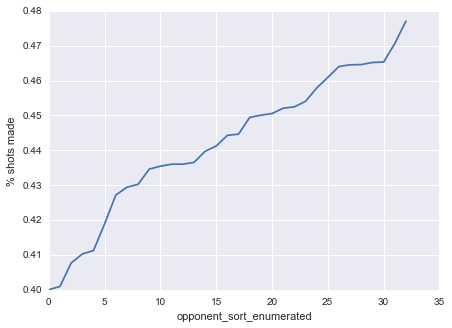

In [41]:
#add opponent_sort_enumerated, slight decrease
sort_encode(data,'opponent')
cols_use5=['action_type_enumerated_sort_enumerated','abs_loc_x','loc_y','opponent_sort_enumerated',
     'playoffs?','home?', 'shot_type?', 'shot_distance','shot_made_flag']
df = data[cols_use5]
df = df.dropna()
print test_auc(df).mean()
print test_accuracy(df).mean()

In [45]:
#pick a few teams, but slight decrease in metrics
data['low_opponents'] = ~data['opponent'].isin(['BKN','IND','MIL','NOP'])
data['low_opponents'].value_counts()

True     28951
False     1746
Name: low_opponents, dtype: int64

In [46]:
cols_use5=['action_type_enumerated_sort_enumerated','abs_loc_x','loc_y','low_opponents',
     'playoffs?','home?', 'shot_type?', 'shot_distance','shot_made_flag']
df = data[cols_use5]
df = df.dropna()
print test_auc(df).mean()
print test_accuracy(df).mean()

0.699248591053
0.682451418782
